In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import os


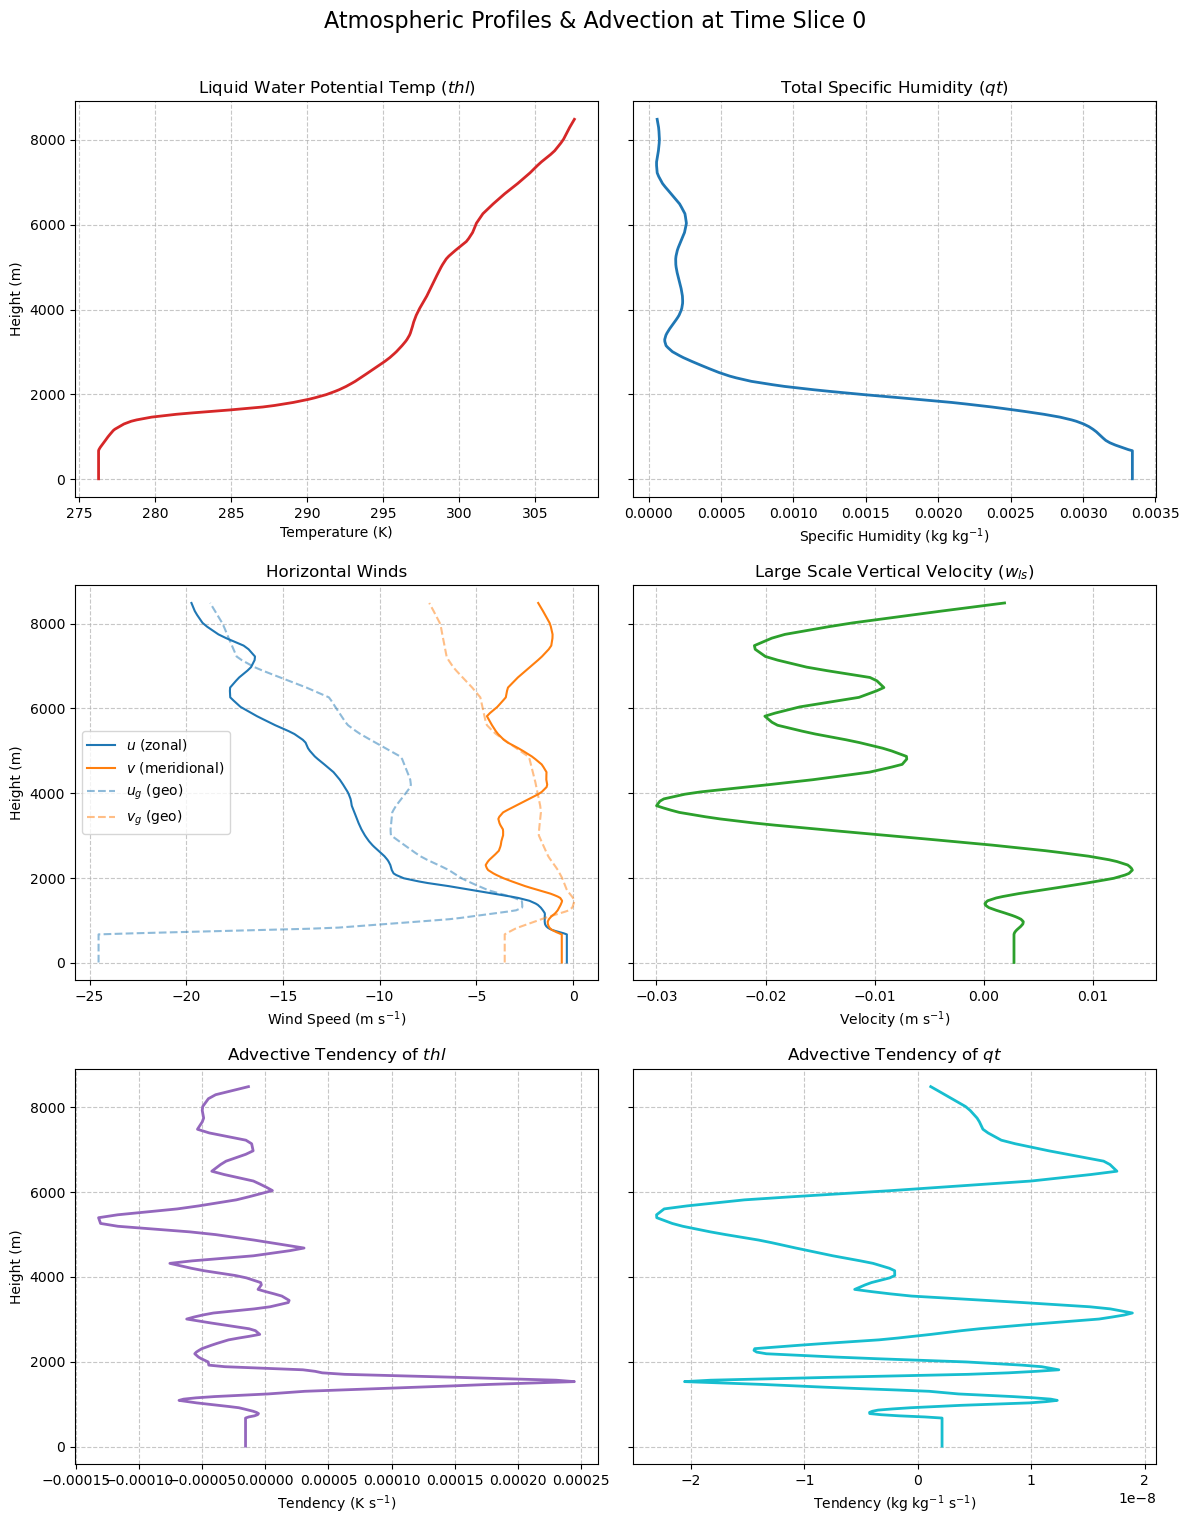

In [2]:
filename = '/Users/yunpeichu/work_dales/mpc_seed/ICON_reglatlon_les_input.nc'

if os.path.exists(filename):
    try:
        ds = xr.open_dataset(filename)
        data_t0 = ds.isel(time=0)
        z = data_t0['z']

        fig, axes = plt.subplots(3, 2, figsize=(12, 16), sharey=True)
        fig.suptitle(f'Atmospheric Profiles & Advection at Time Slice 0', fontsize=16)

        # --- Row 1: State Variables (Temperature and Humidity) ---

        # 1. Liquid Water Potential Temperature (thl)
        axes[0, 0].plot(data_t0['thl'], z, color='tab:red', linewidth=2)
        axes[0, 0].set_title('Liquid Water Potential Temp ($thl$)')
        axes[0, 0].set_xlabel('Temperature (K)')
        axes[0, 0].set_ylabel('Height (m)')
        axes[0, 0].grid(True, linestyle='--', alpha=0.7)

        # 2. Total Specific Humidity (qt)
        axes[0, 1].plot(data_t0['qt'], z, color='tab:blue', linewidth=2)
        axes[0, 1].set_title('Total Specific Humidity ($qt$)')
        axes[0, 1].set_xlabel('Specific Humidity (kg kg$^{-1}$)')
        axes[0, 1].grid(True, linestyle='--', alpha=0.7)


        # --- Row 2: Dynamics (Winds) ---

        # 3. Horizontal Winds (u, v) vs Geostrophic (ug, vg)
        axes[1, 0].plot(data_t0['u'], z, label='$u$ (zonal)', color='tab:blue')
        axes[1, 0].plot(data_t0['v'], z, label='$v$ (meridional)', color='tab:orange')
        axes[1, 0].plot(data_t0['ug'], z, label='$u_g$ (geo)', linestyle='--', color='tab:blue', alpha=0.5)
        axes[1, 0].plot(data_t0['vg'], z, label='$v_g$ (geo)', linestyle='--', color='tab:orange', alpha=0.5)
        axes[1, 0].set_title('Horizontal Winds')
        axes[1, 0].set_xlabel('Wind Speed (m s$^{-1}$)')
        axes[1, 0].set_ylabel('Height (m)')
        axes[1, 0].legend(loc='best')
        axes[1, 0].grid(True, linestyle='--', alpha=0.7)

        # 4. Vertical Velocity (wls)
        axes[1, 1].plot(data_t0['wls'], z, color='tab:green', linewidth=2)
        axes[1, 1].set_title('Large Scale Vertical Velocity ($w_{ls}$)')
        axes[1, 1].set_xlabel('Velocity (m s$^{-1}$)')
        axes[1, 1].grid(True, linestyle='--', alpha=0.7)


        # --- Row 3: Advective Tendencies ---

        # 5. Advective Tendency of Potential Temperature (dtthl_advec)
        axes[2, 0].plot(data_t0['dtthl_advec'], z, color='tab:purple', linewidth=2)
        axes[2, 0].set_title('Advective Tendency of $thl$')
        axes[2, 0].set_xlabel('Tendency (K s$^{-1}$)')
        axes[2, 0].set_ylabel('Height (m)')
        axes[2, 0].grid(True, linestyle='--', alpha=0.7)

        # 6. Advective Tendency of Specific Humidity (dtqt_advec)
        axes[2, 1].plot(data_t0['dtqt_advec'], z, color='tab:cyan', linewidth=2)
        axes[2, 1].set_title('Advective Tendency of $qt$')
        axes[2, 1].set_xlabel('Tendency (kg kg$^{-1}$ s$^{-1}$)')
        axes[2, 1].grid(True, linestyle='--', alpha=0.7)

        plt.savefig('profile_plots.png', dpi=300)
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])
        plt.show()

    except Exception as e:
        print(f"Error reading or plotting netCDF file: {e}")
else:
    print(f"File {filename} not found in the current directory.")